# Problem Statement

- Prepare a classification model using Naive Bayes for salary data 


### Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation -- occupation of an individuals
- relationship -- 	
- race -- Race of an Individual
- sex -- Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss -- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('SalaryData_Train.csv')
test = pd.read_csv('SalaryData_Test.csv')

# EDA

In [3]:
train.shape, test.shape

((30161, 14), (15060, 14))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


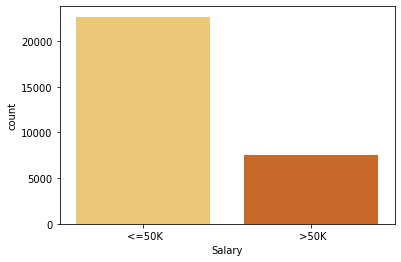

In [6]:
sns.countplot(train['Salary'], palette='YlOrBr')

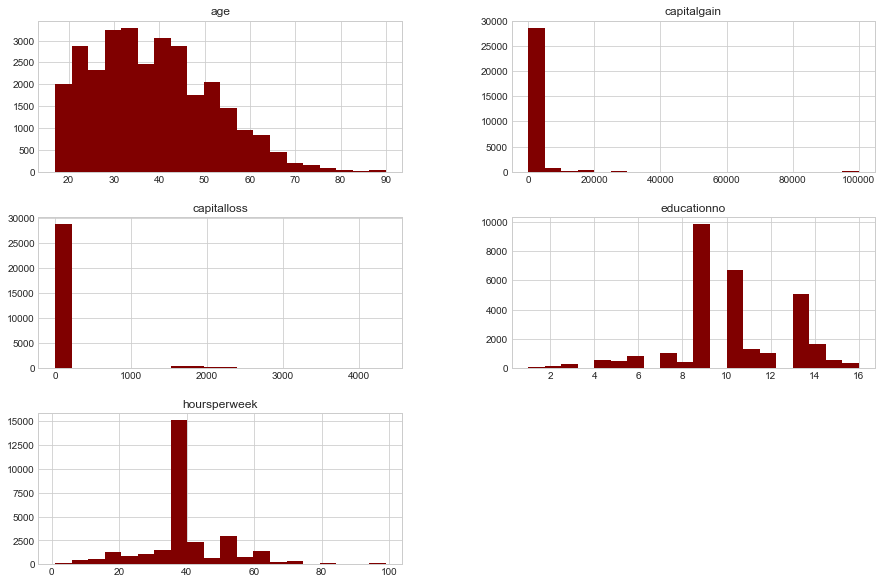

In [7]:
plt.style.use('seaborn-whitegrid')

train.hist(bins=20, figsize=(15,10), color='maroon')
plt.show()

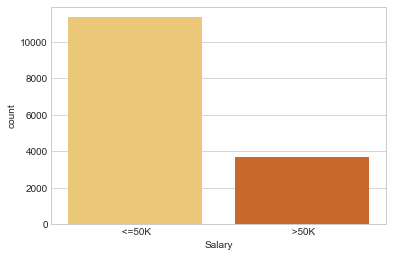

In [8]:
sns.countplot(test['Salary'], palette='YlOrBr')

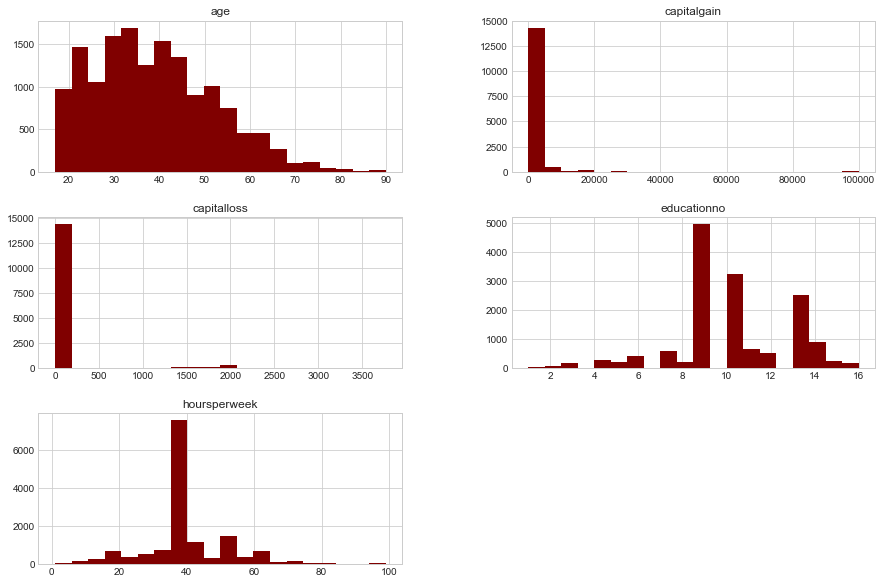

In [9]:
plt.style.use('seaborn-whitegrid')

test.hist(bins=20, figsize=(15,10), color='maroon')
plt.show()

# Preprocessing

In [10]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [11]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [13]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [14]:
for i in string_columns:
    train[i]=label_encoder.fit_transform(train[i])
    test[i]=label_encoder.fit_transform(test[i])

# Model Preperation

In [15]:
col_names=list(train.columns)
col_names

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [16]:
train_X=train[col_names[0:13]]
train_X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [17]:
train_Y=train[col_names[13]]
train_Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [18]:
test_X=test[col_names[0:13]]
test_X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [19]:
test_y=test[col_names[13]]
test_y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

# 1. GaussianNB Model

## 1.1 Model Building

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#### Training Dataset model

In [21]:
model_train = GaussianNB()

In [22]:
model_train.fit(train_X, train_Y)

GaussianNB()

In [23]:
y_pred_train = model_train.predict(train_X)
y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [24]:
y_prob_train = model_train.predict_proba(train_X)
y_prob_train

array([[7.30377542e-01, 2.69622458e-01],
       [9.50612303e-01, 4.93876967e-02],
       [9.91160663e-01, 8.83933667e-03],
       ...,
       [9.99998535e-01, 1.46525812e-06],
       [9.99909188e-01, 9.08117201e-05],
       [6.43809108e-53, 1.00000000e+00]])

In [25]:
train_score = accuracy_score(train_Y, y_pred_train)
train_score

0.7953317197705646

#### Testing Dataset model

In [26]:
model_test = GaussianNB()

In [27]:
model_test.fit(train_X, train_Y)

GaussianNB()

In [28]:
y_pred_test = model_test.predict(test_X)
y_pred_test 

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [29]:
y_prob_test = model_test.predict_proba(test_X)
y_prob_test

array([[9.99996933e-01, 3.06748413e-06],
       [9.24531822e-01, 7.54681781e-02],
       [9.57529122e-01, 4.24708780e-02],
       ...,
       [7.67228976e-01, 2.32771024e-01],
       [7.50995305e-05, 9.99924900e-01],
       [7.65688684e-01, 2.34311316e-01]])

In [30]:
test_score = accuracy_score(test_y, y_pred_test)
test_score

0.7946879150066402

# 1.2 Model Evaluation

In [31]:
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## 1.2.1 Evaluating training dataset model

### Learning Curve 

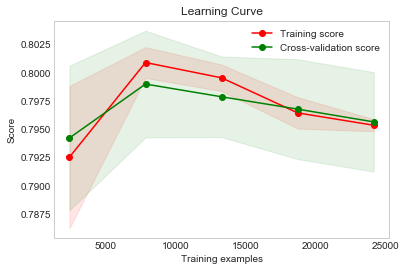

In [32]:
skplt.estimators.plot_learning_curve(model_train, train_X, train_Y)

### Confusion Matrix

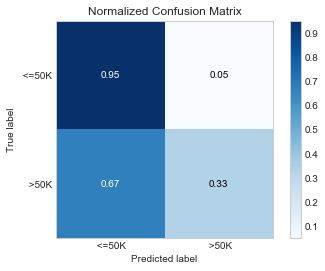

In [33]:
skplt.metrics.plot_confusion_matrix(train_Y, y_pred_train, normalize=True)

### ROC Curve

In [34]:
class_1_prob = list()

In [35]:
for i in y_prob_train:
    class_1_prob.append(i[1])
print(roc_auc_score(train_Y, class_1_prob))

0.8543146407895206


In [36]:
# To store result from different models
model_result = {}

model_result['GaussianNB_Train'] = roc_auc_score(train_Y, class_1_prob)

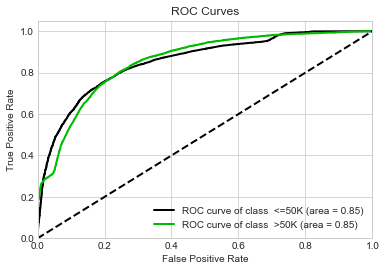

In [37]:
skplt.metrics.plot_roc_curve(train_Y, y_prob_train, curves=['each_class'])

## 1.2.2 Evaluating testing dataset model

### Learning Curve

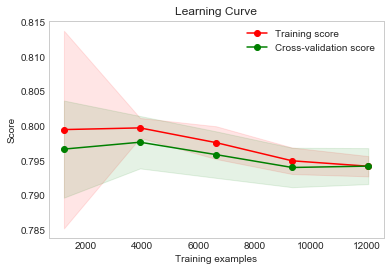

In [38]:
skplt.estimators.plot_learning_curve(model_test, test_X, test_y)

### Confusion Matrix

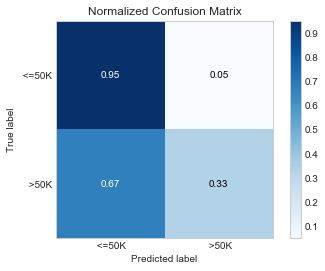

In [39]:
skplt.metrics.plot_confusion_matrix(test_y, y_pred_test, normalize=True)

### ROC Curve

In [40]:
class_2_prob = list()

In [41]:
for i in y_prob_test:
    class_2_prob.append(i[1])
print(roc_auc_score(test_y, class_2_prob))

0.8523163898934146


In [42]:
model_result['GaussianNB_Test'] = roc_auc_score(test_y, class_2_prob)

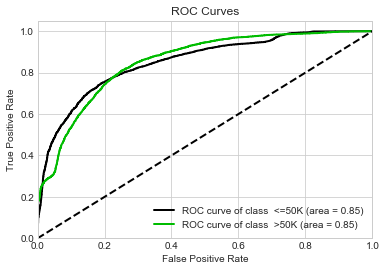

In [43]:
skplt.metrics.plot_roc_curve(test_y, y_prob_test, curves=['each_class'])

In [44]:
model_result

{'GaussianNB_Train': 0.8543146407895206, 'GaussianNB_Test': 0.8523163898934146}

# MultinomialNB Model 

## 2.1 Model Building

In [45]:
from sklearn.naive_bayes import MultinomialNB
Mnbmodel = MultinomialNB()

#### Training Dataset model

In [46]:
train_pred_multi = Mnbmodel.fit(train_X,train_Y).predict(train_X)
train_pred_multi

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [47]:
# Predicting the probabilities

train_prob_multi = Mnbmodel.fit(train_X,train_Y).predict_proba(train_X)
train_prob_multi

array([[0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.41468303e-143],
       [1.00000000e+000, 1.63098669e-155],
       ...,
       [1.00000000e+000, 4.33606467e-181],
       [1.00000000e+000, 2.36332689e-121],
       [0.00000000e+000, 1.00000000e+000]])

#### Testing Dataset model

In [48]:
test_pred_multi = Mnbmodel.fit(train_X,train_Y).predict(test_X)
test_pred_multi

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [49]:
test_prob_multi = Mnbmodel.fit(train_X,train_Y).predict_proba(test_X)
test_prob_multi

array([[1.00000000e+000, 2.00945129e-136],
       [1.00000000e+000, 1.13933193e-165],
       [1.00000000e+000, 2.29132822e-149],
       ...,
       [1.00000000e+000, 7.46534699e-173],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 8.11111235e-175]])

# Model Evaluation

## 2.2.1 Evaluating training dataset model

### Learning Curve

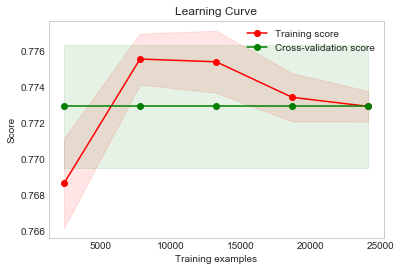

In [50]:
skplt.estimators.plot_learning_curve(Mnbmodel, train_X, train_Y)

### Confusion Matix

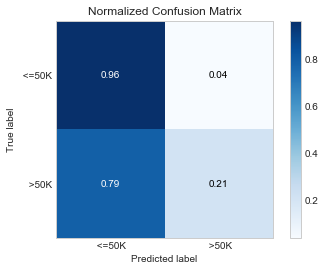

In [51]:
skplt.metrics.plot_confusion_matrix(train_Y, train_pred_multi, normalize=True)

### ROC Curve

In [52]:
class_3_prob = list()

In [53]:
for i in train_prob_multi:
    class_3_prob.append(i[1])
print(roc_auc_score(train_Y, class_3_prob))

0.4064299453469559


In [54]:
model_result['Multi_Nomial_Train'] = roc_auc_score(train_Y, class_3_prob)

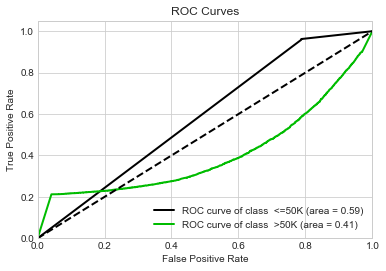

In [55]:
skplt.metrics.plot_roc_curve(train_Y, train_prob_multi, curves=['each_class'])

## 2.2.1 Evaluating testing dataset model

### Learning Curve

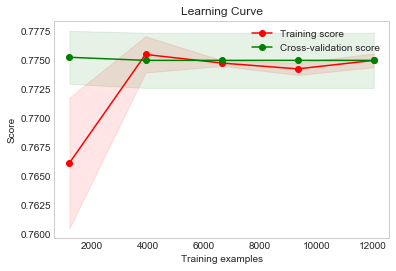

In [56]:
skplt.estimators.plot_learning_curve(Mnbmodel, test_X, test_y)

### Confusion Matrix

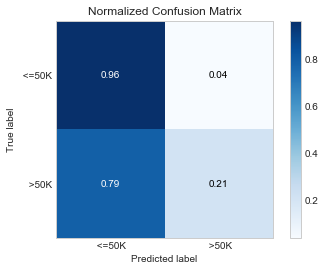

In [57]:
skplt.metrics.plot_confusion_matrix(test_y, test_pred_multi, normalize=True)

### ROC Curve

In [58]:
class_4_prob = list()

In [59]:
for i in test_prob_multi:
    class_4_prob.append(i[1])
print(roc_auc_score(test_y, class_4_prob))

0.4129301722497145


In [60]:
model_result['Multi_Nomial_Test'] = roc_auc_score(test_y, class_4_prob)

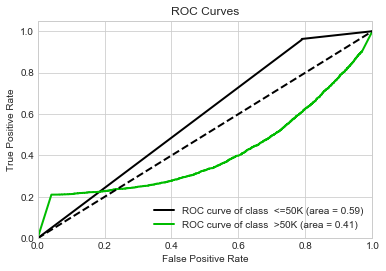

In [61]:
skplt.metrics.plot_roc_curve(test_y, test_prob_multi, curves=['each_class'])

# Inference

In [62]:
model_result

{'GaussianNB_Train': 0.8543146407895206,
 'GaussianNB_Test': 0.8523163898934146,
 'Multi_Nomial_Train': 0.4064299453469559,
 'Multi_Nomial_Test': 0.4129301722497145}

#### So from above model result summary, we can say GaussianNB algorithm is more suitable for our dataset.